In this notebook, I define a class for performing an ordinary-least-squares (OLS) linear regression for the sale prices. The OLS fitting will be included as a class method. The original code for the OLS fitting class can be found on David Ziganto's blog *Standard Deviations* here: **https://dziganto.github.io/classes/data%20science/linear%20regression/machine%20learning/object-oriented%20programming/python/Understanding-Object-Oriented-Programming-Through-Machine-Learning/**

In [1]:
from utils import LinearRegression
from utils import normalize_feats, sort_dict_by_abs_val
import matplotlib.pyplot as plt, numpy as np, pandas as pd, pickle

Load the numerical feature data.

In [4]:
df = pd.read_csv('AmesHousing_NumericalFeatures.csv')
cols = list(df.columns)

In [5]:
max_vals_dict = dict()
mean_vals_dict = dict()

for col in cols:
    
    vals = list(df[col].values)
    
    max_val = np.max(vals)
    mean_val = np.mean(vals)

    max_vals_dict[col] = max_val
    mean_vals_dict[col] = mean_val
    
    df[col] = df[col].apply(lambda x: x/max_val)

In [7]:
max_vals_dict, mean_vals_dict

({'Lot Area': 215245,
  'Year Built': 2010,
  'Year Remod/Add': 2010,
  'Mas Vnr Area': 1600.0,
  'BsmtFin SF 1': 5644.0,
  'BsmtFin SF 2': 1526.0,
  'Bsmt Unf SF': 2336.0,
  'Total Bsmt SF': 6110.0,
  '1st Flr SF': 5095,
  '2nd Flr SF': 2065,
  'Low Qual Fin SF': 1064,
  'Gr Liv Area': 5642,
  'Bsmt Full Bath': 2.0,
  'Bsmt Half Bath': 2.0,
  'Full Bath': 4,
  'Half Bath': 2,
  'Bedroom AbvGr': 6,
  'Kitchen AbvGr': 3,
  'TotRms AbvGrd': 15,
  'Fireplaces': 4,
  'Garage Yr Blt': 2010.0,
  'Garage Cars': 5.0,
  'Garage Area': 1488.0,
  'Wood Deck SF': 1424,
  'Open Porch SF': 570,
  'Enclosed Porch': 1012,
  '3Ssn Porch': 508,
  'Screen Porch': 576,
  'Pool Area': 800,
  'Misc Val': 17000,
  'Mo Sold': 12,
  'Yr Sold': 2010,
  'SalePrice': 755000},
 {'Lot Area': 10268.491081179469,
  'Year Built': 1972.704040771751,
  'Year Remod/Add': 1984.6840189297416,
  'Mas Vnr Area': 106.9399344739716,
  'BsmtFin SF 1': 455.3494721514379,
  'BsmtFin SF 2': 52.292682926829265,
  'Bsmt Unf SF': 558

In [8]:
with open('num_vars_max_vals_dict.pickle', 'wb') as handle:
    pickle.dump(max_vals_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
with open('num_vars_mean_vals_dict.pickle', 'wb') as handle:
    pickle.dump(mean_vals_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
df

,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0.147599,0.975124,0.975124,0.07000,0.113218,0.000000,0.188784,0.176759,0.325025,0.000000,...,0.147472,0.108772,0.0,0.0,0.000000,0.0,0.000000,0.416667,1.00000,0.284768
1,0.053994,0.975622,0.975622,0.00000,0.082920,0.094364,0.115582,0.144354,0.175859,0.000000,...,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.500000,1.00000,0.139073
2,0.066283,0.974129,0.974129,0.06750,0.163536,0.000000,0.173801,0.217512,0.260844,0.000000,...,0.275983,0.063158,0.0,0.0,0.000000,0.0,0.735294,0.500000,1.00000,0.227815
3,0.051848,0.979104,0.979104,0.00000,0.188696,0.000000,0.447346,0.345336,0.414132,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.333333,1.00000,0.323179
4,0.064252,0.993532,0.994030,0.00000,0.140149,0.000000,0.058647,0.151882,0.182139,0.339467,...,0.148876,0.059649,0.0,0.0,0.000000,0.0,0.000000,0.250000,1.00000,0.251523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,0.092917,0.975124,0.993035,0.00000,0.216867,0.000000,0.000000,0.200327,0.240236,0.000000,...,0.332865,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.750000,0.99801,0.173510
2743,0.036874,0.987065,0.987065,0.00000,0.145110,0.000000,0.078767,0.164157,0.196860,0.000000,...,0.084270,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.99801,0.188742
2744,0.041279,0.986567,0.986567,0.00000,0.053331,0.212320,0.102312,0.141408,0.177036,0.000000,...,0.115169,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.500000,0.99801,0.173510
2745,0.046505,0.982090,0.982587,0.00000,0.189759,0.080603,0.083476,0.227332,0.272620,0.000000,...,0.168539,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.99801,0.225166


Let's take the data above and perform an OLS linear regression for the sale prices.

In [12]:
lin_reg = LinearRegression()

X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

lin_reg.fit(X, y)
intercept = np.around(lin_reg.intercept_[0], 4)
coeffs = [np.around(item[0], 4) for item in lin_reg.coeffs_]

print(intercept)
print(coeffs)

27.086
[0.7465, 11.3766, -36.555, 0.6367, 2347628382242.062, 634741479677.9558, 971661924330.4752, -2541461625710.3022, 4.4943, 1.6504, 0.6369, -4.0331, 0.0163, -0.008, 0.0064, -0.0101, -0.0827, -0.1782, 0.1009, 0.0378, -0.0698, 0.0807, 0.0484, 0.0364, -0.0087, 0.0336, 0.0064, 0.0492, -0.0603, -0.2196, 0.0003, -1.8779]


We see that naïvely applying the OLS regression directly do the raw numerical data produces coefficients whose magntidues vary over many orders of magnitude. This can be fixed by removing highly unbalanced features.

The investigation starts with looking at the distribution of values for each feature.

We can see that `BsmtFin SF 2` has only 12.5% of its values greater than zero. So, let's see what happens when we remove this feature.

In [13]:
df.drop(columns=['BsmtFin SF 2'], inplace=True)

In [14]:
lin_reg = LinearRegression()

X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

lin_reg.fit(X, y)

intercept, coeffs = lin_reg.intercept_[0], [item[0] for item in lin_reg.coeffs_]
print(intercept)
print(coeffs)

1.2778365394915454
[0.6995168024882616, -2.8330590174919053, 3.5434755347996543, 0.08916910101622122, -0.05223483202303214, -0.018349746833749236, 0.6287905202784216, -4.75, -1.5625, -0.96875, 4.5, 0.01633468067377919, -0.008022739582343341, 0.006356065431219804, -0.010091772039217517, -0.08274638580506632, -0.17822962554043542, 0.10091059979083639, 0.03776993494034997, -0.06977799461128598, 0.08066476735615424, 0.04840052305350184, 0.03636256512252167, -0.008693227022590122, 0.033563768322938614, 0.006371467132993303, 0.04924431599654966, -0.060262153133464835, -0.21964585130876912, 0.0002658194518971868, -1.8779442147351801]


I do not understand why the elimination of this single feature fixed the problem of very high coefficient magnitudes for other features ordered near it.

Now we need to address the issue of the significant variability in order of magnitude among the remaining coefficients. My intuition is that it is partly due to the fact that each feature has a different characteristic order of magnitude among its distribution of values. We thus normalize all feature values by their maximum value.

In [15]:
cols = list(df.columns)

When normalizing the values for each feature, we need to keep track of the maximum values used to normalize for future situation in which we want to convert back to the original values. This is especially critical for the sale prices: we want to be able to convert back to the original number of dollars.

In [16]:
df.head()

,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0.147599,0.975124,0.975124,0.0700,0.113218,0.188784,0.176759,0.325025,0.000000,0.0,...,0.147472,0.108772,0.0,0.0,0.000000,0.0,0.000000,0.416667,1.0,0.284768
1,0.053994,0.975622,0.975622,0.0000,0.082920,0.115582,0.144354,0.175859,0.000000,0.0,...,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.500000,1.0,0.139073
2,0.066283,0.974129,0.974129,0.0675,0.163536,0.173801,0.217512,0.260844,0.000000,0.0,...,0.275983,0.063158,0.0,0.0,0.000000,0.0,0.735294,0.500000,1.0,0.227815
3,0.051848,0.979104,0.979104,0.0000,0.188696,0.447346,0.345336,0.414132,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.333333,1.0,0.323179
4,0.064252,0.993532,0.994030,0.0000,0.140149,0.058647,0.151882,0.182139,0.339467,0.0,...,0.148876,0.059649,0.0,0.0,0.000000,0.0,0.000000,0.250000,1.0,0.251523


In [17]:
lin_reg = LinearRegression()

X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

lin_reg.fit(X, y)

intercept, coeffs = lin_reg.intercept_[0], [item[0] for item in lin_reg.coeffs_]

print(intercept)
print(coeffs)

1.2778365394915454
[0.6995168024882616, -2.8330590174919053, 3.5434755347996543, 0.08916910101622122, -0.05223483202303214, -0.018349746833749236, 0.6287905202784216, -4.75, -1.5625, -0.96875, 4.5, 0.01633468067377919, -0.008022739582343341, 0.006356065431219804, -0.010091772039217517, -0.08274638580506632, -0.17822962554043542, 0.10091059979083639, 0.03776993494034997, -0.06977799461128598, 0.08066476735615424, 0.04840052305350184, 0.03636256512252167, -0.008693227022590122, 0.033563768322938614, 0.006371467132993303, 0.04924431599654966, -0.060262153133464835, -0.21964585130876912, 0.0002658194518971868, -1.8779442147351801]


In [24]:
sorted_coeffs_names_dict = sort_dict_by_abs_val(dict(zip(cols, coeffs)))
sorted_coeffs_names_dict

{'Mas Vnr Area': -0.00036307700338511495,
 'Total Bsmt SF': -0.004471822233313105,
 'Low Qual Fin SF': 0.013482368755951768,
 'Year Built': -0.04168296404755267,
 'Year Remod/Add': 0.08701902918384263,
 'Gr Liv Area': 0.09898876890275687,
 'BsmtFin SF 1': 0.10341145766502535,
 'Half Bath': 0.12684779564220605,
 'Bsmt Full Bath': 0.1370897145804406,
 'Bsmt Unf SF': 0.2039011984835497,
 '2nd Flr SF': -0.2202123582974025,
 'Full Bath': -0.22239778148636447,
 'Bsmt Half Bath': -0.3496207479660143,
 'Lot Area': 0.351058447566686,
 'Bedroom AbvGr': -0.42005250389939874,
 'Kitchen AbvGr': -0.5,
 'TotRms AbvGrd': -0.875,
 'Garage Yr Blt': 1.0155395413471524,
 'Garage Cars': 1.4007615269979397,
 'Fireplaces': -1.785935532534495,
 'Wood Deck SF': -2.0,
 'Garage Area': 2.875,
 '1st Flr SF': 6.930530193929371}

Now we can make a feature importance plot with this dictionary.

In [39]:
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

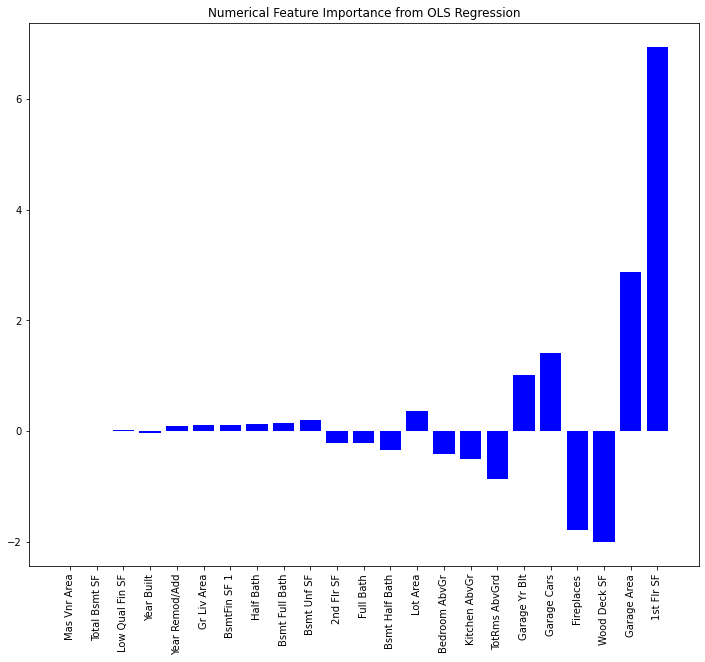

In [25]:
x = sorted_coeffs_names_dict.keys()
y = sorted_coeffs_names_dict.values()
fig, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation=90)
plt.title('Numerical Feature Importance from OLS Regression')
plt.bar(x,y, color='blue')
plt.show()

In [20]:
strong_feats = list(sorted_coeffs_names_dict.keys())[8:]

In [21]:
df = df[strong_feats+['SalePrice']]

In [26]:
df.head()

,Enclosed Porch,Wood Deck SF,Fireplaces,Garage Area,Screen Porch,BsmtFin SF 1,Pool Area,Garage Yr Blt,Garage Cars,Bedroom AbvGr,...,Total Bsmt SF,Lot Area,Low Qual Fin SF,2nd Flr SF,Yr Sold,Year Built,Year Remod/Add,Gr Liv Area,1st Flr SF,SalePrice
0,0.0,0.147472,0.50,0.354839,0.000000,0.113218,0.0,0.975124,0.4,0.500000,...,0.176759,0.147599,0.0,0.000000,1.0,0.975124,0.975124,0.293513,0.325025,0.284768
1,0.0,0.098315,0.00,0.490591,0.208333,0.082920,0.0,0.975622,0.2,0.333333,...,0.144354,0.053994,0.0,0.000000,1.0,0.975622,0.975622,0.158809,0.175859,0.139073
2,0.0,0.275983,0.00,0.209677,0.000000,0.163536,0.0,0.974129,0.2,0.500000,...,0.217512,0.066283,0.0,0.000000,1.0,0.974129,0.974129,0.235555,0.260844,0.227815
3,0.0,0.000000,0.50,0.350806,0.000000,0.188696,0.0,0.979104,0.4,0.500000,...,0.345336,0.051848,0.0,0.000000,1.0,0.979104,0.979104,0.373981,0.414132,0.323179
4,0.0,0.148876,0.25,0.323925,0.000000,0.140149,0.0,0.993532,0.4,0.500000,...,0.151882,0.064252,0.0,0.339467,1.0,0.993532,0.994030,0.288727,0.182139,0.251523


In [27]:
cols = list(df.columns)

In [28]:
lin_reg = LinearRegression()

X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

lin_reg.fit(X, y)

intercept, coeffs = lin_reg.intercept_[0], [item[0] for item in lin_reg.coeffs_]

print(intercept)
print(coeffs)

-7.210077769472264
[0.351058447566686, -0.04168296404755267, 0.08701902918384263, -0.00036307700338511495, 0.10341145766502535, 0.2039011984835497, -0.004471822233313105, 6.930530193929371, -0.2202123582974025, 0.013482368755951768, 0.09898876890275687, 0.1370897145804406, -0.3496207479660143, -0.22239778148636447, 0.12684779564220605, -0.42005250389939874, -0.5, -0.875, -1.785935532534495, 1.0155395413471524, 1.4007615269979397, 2.875, -2.0]


In [29]:
df.to_csv('AmesHousing_NormStrongNumericalFeatures.csv', index=False)

We have implemented an OLS regression using object-orientation, shown how running a preliminary naïve regression fitting provides anomalous feature detection, normalized the numerical values for each feature by their maxima and have removed the anomalous feature to produce a reasonable set of regression coefficients. These reasonable coefficients were then visualized above in a feature importance plot.

Note the value we have received from running a linear regression without even knowing about the quality of the fit. Inspecting the regression coefficients themselves guided us into our first first engineering step(s).

Next time, we are going to: (1) introduce a new "metrics" class for evaluating the performance of the regression model and (2) introduce class inheritance so that the regression fitting class can gain access to these metrics.

In [30]:
with open('num_vars_max_vals_dict.pickle', 'rb') as handle:
    b = pickle.load(handle)
print(b)

{'Lot Area': 215245, 'Year Built': 2010, 'Year Remod/Add': 2010, 'Mas Vnr Area': 1600.0, 'BsmtFin SF 1': 5644.0, 'BsmtFin SF 2': 1526.0, 'Bsmt Unf SF': 2336.0, 'Total Bsmt SF': 6110.0, '1st Flr SF': 5095, '2nd Flr SF': 2065, 'Low Qual Fin SF': 1064, 'Gr Liv Area': 5642, 'Bsmt Full Bath': 2.0, 'Bsmt Half Bath': 2.0, 'Full Bath': 4, 'Half Bath': 2, 'Bedroom AbvGr': 6, 'Kitchen AbvGr': 3, 'TotRms AbvGrd': 15, 'Fireplaces': 4, 'Garage Yr Blt': 2010.0, 'Garage Cars': 5.0, 'Garage Area': 1488.0, 'Wood Deck SF': 1424, 'Open Porch SF': 570, 'Enclosed Porch': 1012, '3Ssn Porch': 508, 'Screen Porch': 576, 'Pool Area': 800, 'Misc Val': 17000, 'Mo Sold': 12, 'Yr Sold': 2010, 'SalePrice': 755000}


In [31]:
with open('num_vars_mean_vals_dict.pickle', 'rb') as handle:
    b = pickle.load(handle)
print(b)

{'Lot Area': 10268.491081179469, 'Year Built': 1972.704040771751, 'Year Remod/Add': 1984.6840189297416, 'Mas Vnr Area': 106.9399344739716, 'BsmtFin SF 1': 455.3494721514379, 'BsmtFin SF 2': 52.292682926829265, 'Bsmt Unf SF': 558.4058973425555, 'Total Bsmt SF': 1066.0480524208226, '1st Flr SF': 1170.650527848562, '2nd Flr SF': 338.6923917000364, 'Low Qual Fin SF': 3.754641427011285, 'Gr Liv Area': 1513.0975609756097, 'Bsmt Full Bath': 0.4386603567528213, 'Bsmt Half Bath': 0.06188569348380051, 'Full Bath': 1.5744448489261011, 'Half Bath': 0.3869676010192938, 'Bedroom AbvGr': 2.8467419002548233, 'Kitchen AbvGr': 1.0349472151437933, 'TotRms AbvGrd': 6.45977429923553, 'Fireplaces': 0.6265016381507099, 'Garage Yr Blt': 1977.8740444120858, 'Garage Cars': 1.8649435748088825, 'Garage Area': 499.1510738987987, 'Wood Deck SF': 97.43429195485984, 'Open Porch SF': 47.71459774299235, 'Enclosed Porch': 22.076082999635968, '3Ssn Porch': 2.7011285038223516, 'Screen Porch': 16.948671277757555, 'Pool Are